# Preparazione di un dataset - E2E

In questa lezione analizzeremo un dataset e lo prepareremo per i successivi passaggi di modellazione.

## 1 - Import e descrizione

Per prima cosa importiamo il nostro dataset riguardante le crisi economiche nei paesi africani, `african_crises.csv`, in un dataframe pandas e cerchiamo di comprendere meglio la natura delle varie feature incluse.

In [61]:
import numpy as np
import pandas as pd

df = pd.read_csv("./datasets/african_crises.csv") # Importiamo il dataset
df.head(5) # Visualizziamo le prime 5 colonne

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,NaN,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


Possiamo già intuire i tipi delle colonne. Notiamo inoltre che il dataset ha alcuni valori mancanti (ad esempio il valore di `exch_usd` alla riga 3). Per avere una visione più completa possiamo applicare alcune funzioni, che per comodità abbiamo raccolto in un'unica funzione `df_info`, in modo da poterle applicare più comodamente durante l'analisi:

In [62]:
def get_info(dataframe):
    """
    Restituisce alcune informazioni di sintesi riguardo al dataset.
    """
    display(
        # concateniamo l'output delle seguenti funzioni lungo l'asse 1, quindi affianchiamo le colonne
        pd.concat(                                              
            [
                # df.dtypes restituisce il tipo di ciascuna colonna del dataframe
                dataframe.dtypes.rename("dtypes"),        
                # df.nunique() restituisce il numero di valori distinti in ciascuna colonna
                dataframe.nunique().rename("n_unique"),  
                # df.isna() restituisce una maschera con valore True quando il valore corrispondente è NaN, 
                # sum() conta il numero di valori True
                dataframe.isna().sum().rename("nan_vals"),      
                # df.describe() restituisce alcune statistiche riguardo alle colonne
                dataframe.describe().transpose()                
            ], 
            axis=1
        )
    )

Applichiamo ora la nostra nuova funzione al dataframe:

In [63]:
get_info(df)

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
case,int64,13,0,1059.0,35.613787,23.692402,1.000000,15.000000,38.000000,56.000000,70.000000
cc3,object,13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,object,13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,int64,155,0,1059.0,1967.767705,33.530632,1860.000000,1951.000000,1973.000000,1994.000000,2014.000000
systemic_crisis,int64,2,0,1059.0,0.077432,0.267401,0.000000,0.000000,0.000000,0.000000,1.000000
exch_usd,float64,702,95,964.0,42.685441,113.174239,0.000000,0.078697,0.852350,8.149925,744.306139
domestic_debt_in_default,int64,2,0,1059.0,0.039660,0.195251,0.000000,0.000000,0.000000,0.000000,1.000000
sovereign_external_debt_default,int64,2,0,1059.0,0.152975,0.360133,0.000000,0.000000,0.000000,0.000000,1.000000
gdp_weighted_default,float64,6,0,1059.0,0.006402,0.043572,0.000000,0.000000,0.000000,0.000000,0.400000
inflation_annual_cpi,float64,936,91,968.0,90.963404,2136.787695,-28.502137,2.087577,5.770044,11.588750,66279.892370


Notiamo alcune cose:

- Le colonne `cc3`, `country` e `banking_crisis` sono di tipo `object`: dovremo trasformarle in valori numerici per favorire la modellizzazione
- Le colonne `systemic_crisis`, `domestic_debt_in_default`, `sovereign_external_debt_default`, `independence`, `currency_crises`, `inflation_crises` sono categoriche
- Le colonne `exch_usd` e `inflation_annual_cpi` hanno valori mancanti: risolveremo questo problema tramite imputazione.
  
Concentriamoci ora sulle colonne di tipo `object`:

In [64]:
for column in df.select_dtypes(exclude=[int, float]):   # Cicliamo fra le colonne ti tipo `object`
    print(column, ":")                                  # Stampiamo il nome della colonna, 
    print(df[column].unique())                          # l'elenco dei valori unici e
    print("*","-"*80,"*")                               # un separatore per chiarezza

cc3 :
['DZA' 'AGO' 'CAF' 'CIV' 'EGY' 'KEN' 'MUS' 'MAR' 'NGA' 'ZAF' 'TUN' 'ZMB'
 'ZWE']
* -------------------------------------------------------------------------------- *
country :
['Algeria' 'Angola' 'Central African Republic' 'Ivory Coast' 'Egypt'
 'Kenya' 'Mauritius' 'Morocco' 'Nigeria' 'South Africa' 'Tunisia' 'Zambia'
 'Zimbabwe']
* -------------------------------------------------------------------------------- *
banking_crisis :
['crisis' 'no_crisis']
* -------------------------------------------------------------------------------- *


- Le colonne `cc3` e `country` sono ridondanti: rappresentano entrambe il paese a cui fa riferimento la riga,
- la colonna `banking_crisis` è categorica: trasformiamola in una variabile numerica.

## Trasformare una variabile `object` in una variabile numerica
### Approccio 1: il metodo `where`

Per trasformare una variabile `object` binaria in una numerica possiamo sfruttare il metodo `where` messo a disposizione dalla libreria numpy:

In [65]:
# Sintassi: where(condition, x, y) se `condition` allora `x` altrimenti `y` 
result_1 = np.where(df["banking_crisis"] == "crisis", 1, 0) 
display(result_1)

array([1, 0, 0, ..., 0, 0, 0])

### Approccio 2: la classe `OneHotEncoder`

In questo caso utilizziamo una classe dalla libreria `scikit-learn`:

In [66]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(                                            
    # Istanziamo un oggetto di classe OneHotEncoder
    handle_unknown="ignore",                                        
    # Transformando un altro dataset (ad esempio un test set, o nuovi dati) 
    # ignoreremo le classi non presenti nel train set
    drop="first",                                                   
    # Con drop='first' l'encoder produrrà n-1 colonne per n classi
    sparse_output= False,                                           
    # A scopo di visualizzazione
    dtype = int
)

encoder.fit(
    df["banking_crisis"]                                    
    # Fittiamo la trasformazione sul nostro dataset
    .to_numpy()
    .reshape(-1,1)
)          

result_2 = (
    encoder.transform(
        df["banking_crisis"]                     
        # Applichiamo la trasformazione sul nostro dataset
       .to_numpy()
       .reshape(-1,1)
    )
)

display(encoder.categories_, result_2)                                
# Mostriamo la categorie trovate e i risultati dell'encoding
# I risultati sono opposti a quelli dell'approccio 1 poiché 
# corrispondono alla seconda categoria, `no_crisis`

[array(['crisis', 'no_crisis'], dtype=object)]

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

Il secondo metodo risulta più complicato ma ha un grande vantaggio: è applicabile a features con un qualsiasi numero di categorie senza modifiche.
Riassegnamo ora la colonna con i valori binari ottenuti:

In [67]:
df["banking_crisis"] = result_1
display(df["banking_crisis"])

0       1
1       0
2       0
3       0
4       0
       ..
1054    1
1055    0
1056    0
1057    0
1058    0
Name: banking_crisis, Length: 1059, dtype: int64

## Aggiungere dati al nostro dataset: localizzazione geografica dei paesi

Sfruttando pandas possiamo aggiungere facilmente altre features al nostro dataset. In questo caso includeremo due nuove colonne, `Latitude (average)` e `Longitude (average)`, le coordinate medie di ciascun paese. Possiamo recuperare il dataset desiderato direttamente da internet:

In [68]:
url = "https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv"
geo_df = pd.read_csv(url, skipinitialspace=True)
geo_df.head(5)

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6


Notiamo che i paesi possono essere identificati con quelli presenti nel nostro dataset sia dalla colonna `Country`, corrispondente a `df["country"]`, che tramite la colonna `Alpha-3 code`, corrispondente alla nostra `df["cc3"]`. Utilizziamo la prima per aggiungere le colonne desiderate al nostro dataframe:

In [69]:
df = pd.merge(                                                  
    # Corrisponde a una query left join dove df.country==geo_df.Country                 
    df, geo_df[["Latitude (average)", "Longitude (average)"]],
    left_on="country", right_on=geo_df["Country"],
    how="left"
)
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,Latitude (average),Longitude (average)
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1,28.0,3.0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0,28.0,3.0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0,28.0,3.0
3,1,DZA,Algeria,1873,0,NaN,0,0,0.0,11.203897,0,0,0,0,28.0,3.0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0,28.0,3.0


Notiamo che la colonna `case` è anch'essa un id per i paesi:

In [70]:
df[["case", "country"]].value_counts()

case  country                 
19    Egypt                       155
56    South Africa                114
70    Zimbabwe                     90
1     Algeria                      85
2     Angola                       77
40    Morocco                      75
63    Tunisia                      75
69    Zambia                       72
38    Mauritius                    68
35    Kenya                        67
15    Ivory Coast                  63
45    Nigeria                      60
10    Central African Republic     58
Name: count, dtype: int64

Possiamo ora rimuoverla, assieme alle colonne `cc3` e `country`:

In [71]:
df = df.drop(columns=["case", "cc3", "country"])
df.columns

Index(['year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises', 'banking_crisis', 'Latitude (average)',
       'Longitude (average)'],
      dtype='object')

# Imputazione dei valori mancanti e trasformazione delle features

Dato che questi processi dipendono dai valori di tutte le righe, separiamo i train e test set prima di applicarli.
Per farlo utilizzeremo la funzione `train_test_split` presente nella libreria `scikit-learn`:

In [72]:
# Importiamo la libreria
from sklearn.model_selection import train_test_split                                

# Scegliamo la frazione (casuale) del dataset riservata a test set
test_size = 0.1                                                                     

# Applichiamo la funzione al nostro dataset. random_state=42 garantisce la riproducibilità del processo
df_train, df_test = train_test_split(df, test_size=test_size, random_state= 42)     

In [73]:
display(get_info(df_train), get_info(df_test));

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
year,int64,149,0,953.0,1967.942288,33.055972,1860.000000,1951.000000,1973.00000,1994.000000,2014.000000
systemic_crisis,int64,2,0,953.0,0.076600,0.266096,0.000000,0.000000,0.00000,0.000000,1.000000
exch_usd,float64,639,83,870.0,42.067763,112.253332,0.000000,0.112810,0.86555,8.149975,744.306139
domestic_debt_in_default,int64,2,0,953.0,0.038825,0.193279,0.000000,0.000000,0.00000,0.000000,1.000000
sovereign_external_debt_default,int64,2,0,953.0,0.151102,0.358336,0.000000,0.000000,0.00000,0.000000,1.000000
gdp_weighted_default,float64,6,0,953.0,0.006600,0.044249,0.000000,0.000000,0.00000,0.000000,0.400000
inflation_annual_cpi,float64,853,74,879.0,97.892350,2242.109243,-28.502137,2.086162,5.76233,11.681735,66279.892370
independence,int64,2,0,953.0,0.770199,0.420925,0.000000,1.000000,1.00000,1.000000,1.000000
currency_crises,int64,3,0,953.0,0.134313,0.353268,0.000000,0.000000,0.00000,0.000000,2.000000
inflation_crises,int64,2,0,953.0,0.133263,0.340038,0.000000,0.000000,0.00000,0.000000,1.000000


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
year,int64,73,0,106.0,1966.198113,37.667068,1866.000000,1948.000000,1972.0000,1995.7500,2014.000
systemic_crisis,int64,2,0,106.0,0.084906,0.280065,0.000000,0.000000,0.0000,0.0000,1.000
exch_usd,float64,83,12,94.0,48.402252,121.857884,0.000000,0.087792,0.6839,7.9104,616.000
domestic_debt_in_default,int64,2,0,106.0,0.047170,0.213009,0.000000,0.000000,0.0000,0.0000,1.000
sovereign_external_debt_default,int64,2,0,106.0,0.169811,0.377251,0.000000,0.000000,0.0000,0.0000,1.000
gdp_weighted_default,float64,3,0,106.0,0.004623,0.037063,0.000000,0.000000,0.0000,0.0000,0.360
inflation_annual_cpi,float64,89,17,89.0,22.530330,105.310024,-12.332411,2.219347,5.8060,10.4000,949.771
independence,int64,2,0,106.0,0.830189,0.377251,0.000000,1.000000,1.0000,1.0000,1.000
currency_crises,int64,2,0,106.0,0.113208,0.318352,0.000000,0.000000,0.0000,0.0000,1.000
inflation_crises,int64,2,0,106.0,0.094340,0.293689,0.000000,0.000000,0.0000,0.0000,1.000


None

None

### Imputazione dei valori mancanti

Come è possibile notare dall'output precedente le colonne `exch_usd` e `inflation_annual_cpi` presentano valori mancanti sia nel train set che nel test set. Osserviamone la percentuale:

In [74]:
perc_miss= pd.DataFrame()
perc_miss['train']=(df_train[['inflation_annual_cpi','exch_usd']].isna().sum()/df_train.shape[0]*100).apply(lambda x: round(x,2))
perc_miss['test']=(df_test[['inflation_annual_cpi','exch_usd']].isna().sum()/df_test.shape[0]*100).apply(lambda x: round(x,2))
perc_miss['total']=(df[['inflation_annual_cpi','exch_usd']].isna().sum()/df.shape[0]*100).apply(lambda x: round(x,2))
display(perc_miss)

,train,test,total
inflation_annual_cpi,7.76,16.04,8.59
exch_usd,8.71,11.32,8.97


Date le percentuali relativamente basse di valori mancanti possiamo imputarli. Per farlo calcoleremo le medie per paese:

In [75]:
groupby_columns = ["Latitude (average)", "Longitude (average)"]
means_by_group = (
    df_train
    .groupby(groupby_columns, as_index=False)
    [["inflation_annual_cpi", "exch_usd"]]
    .mean()
)
display(means_by_group)

,Latitude (average),Longitude (average),inflation_annual_cpi,exch_usd
0,-29.0000,24.00,4.839959,1.669615
1,-20.2833,57.55,6.938938,12.818834
2,-20.0000,30.00,891.831483,17.355422
3,-15.0000,30.00,23.091585,1.107181
4,-12.5000,18.50,160.082742,17.449914
5,1.0000,38.00,8.916914,30.226912
6,7.0000,21.00,6.559717,390.295182
7,8.0000,-5.00,6.196444,149.984615
8,10.0000,8.00,13.797990,36.954098
9,27.0000,30.00,5.101543,1.003425


Possiamo ora assegnare i valori sfruttando il metodo `combine_first`: questo metodo sostituisce i valori mancanti del primo dataframe con quelli presenti nella corrispondente colonna del secondo.

In [76]:
df_train.set_index(["Latitude (average)", "Longitude (average)"], inplace=True)
df_test.set_index(["Latitude (average)", "Longitude (average)"], inplace=True)
means_by_group.set_index(["Latitude (average)", "Longitude (average)"], inplace=True)
df_train = df_train.combine_first(means_by_group).reset_index()
df_test = df_test.combine_first(means_by_group).reset_index()
display(get_info(df_train), get_info(df_test))

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
Latitude (average),float64,13,0,953.0,4.096469,22.381538,-29.000000,-20.0000,7.000000,27.000000,34.000000
Longitude (average),float64,10,0,953.0,20.802308,16.260677,-5.000000,8.0000,24.000000,30.000000,57.550000
banking_crisis,int64,2,0,953.0,0.087093,0.282120,0.000000,0.0000,0.000000,0.000000,1.000000
currency_crises,int64,3,0,953.0,0.134313,0.353268,0.000000,0.0000,0.000000,0.000000,2.000000
domestic_debt_in_default,int64,2,0,953.0,0.038825,0.193279,0.000000,0.0000,0.000000,0.000000,1.000000
exch_usd,float64,652,0,953.0,42.736797,111.311860,0.000000,0.1987,1.222800,11.560000,744.306139
gdp_weighted_default,float64,6,0,953.0,0.006600,0.044249,0.000000,0.0000,0.000000,0.000000,0.400000
independence,int64,2,0,953.0,0.770199,0.420925,0.000000,1.0000,1.000000,1.000000,1.000000
inflation_annual_cpi,float64,866,0,953.0,97.635575,2154.253497,-28.502137,2.4310,5.949439,12.098934,66279.892370
inflation_crises,int64,2,0,953.0,0.133263,0.340038,0.000000,0.0000,0.000000,0.000000,1.000000


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
Latitude (average),float64,13,0,106.0,6.229247,21.193732,-29.000000,-15.000000,7.500000,27.000000,34.000
Longitude (average),float64,10,0,106.0,21.163208,16.153605,-5.000000,8.250000,24.000000,30.000000,57.550
banking_crisis,int64,2,0,106.0,0.103774,0.306415,0.000000,0.000000,0.000000,0.000000,1.000
currency_crises,int64,2,0,106.0,0.113208,0.318352,0.000000,0.000000,0.000000,0.000000,1.000
domestic_debt_in_default,int64,2,0,106.0,0.047170,0.213009,0.000000,0.000000,0.000000,0.000000,1.000
exch_usd,float64,94,0,106.0,49.741805,120.309597,0.000000,0.197975,1.766013,15.429366,616.000
gdp_weighted_default,float64,3,0,106.0,0.004623,0.037063,0.000000,0.000000,0.000000,0.000000,0.360
independence,int64,2,0,106.0,0.830189,0.377251,0.000000,1.000000,1.000000,1.000000,1.000
inflation_annual_cpi,float64,100,0,106.0,38.135848,153.808144,-12.332411,2.515346,5.940126,10.288750,949.771
inflation_crises,int64,2,0,106.0,0.094340,0.293689,0.000000,0.000000,0.000000,0.000000,1.000


None

None

Ora non abbiamo più valori mancanti.

### Outliers e trasformazione features

Procediamo studiando la distribuzione delle feature di tipo `float` ed eventualmente trasformandole, processo che spesso rende più semplice la modellizazione.
Dalle precedenti chiamate di `df_info` possiamo notare che il range di `exch_usd` è [0, 744.306139] mentre per `inflation_annual_cpi` è [-28.502137,66279.892370].
Innanzituto visualizziamo la distribuzione delle due feature:

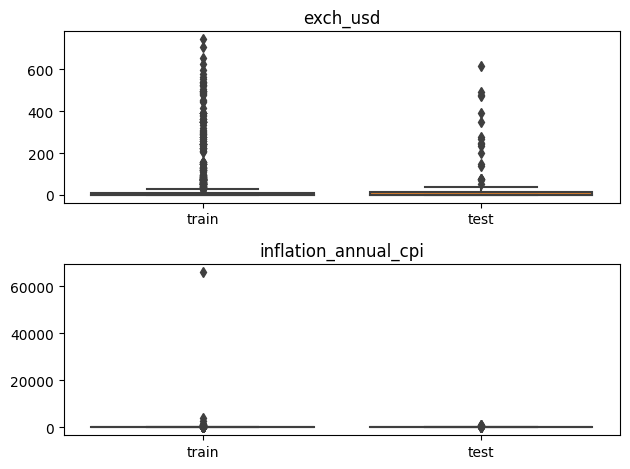

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2)
sns.boxplot([df_train["exch_usd"],df_test["exch_usd"]], ax=axs[0])
sns.boxplot([df_train["inflation_annual_cpi"],df_test["inflation_annual_cpi"]], ax=axs[1])
axs[0].title.set_text("exch_usd")
axs[1].title.set_text("inflation_annual_cpi")
axs[0].set_xticks(ticks=[0,1],labels=["train","test"])
axs[1].set_xticks(ticks=[0,1],labels=["train","test"])
plt.tight_layout()

Mentre `exch_usd` mostra una distribuzione a coda lunga, per `inflation_annual_cpi` è evidente la presenza di un outlier nel train set con valore ~60000. Rimuoviamolo e visualizziamo di nuovo le distribuzioni:

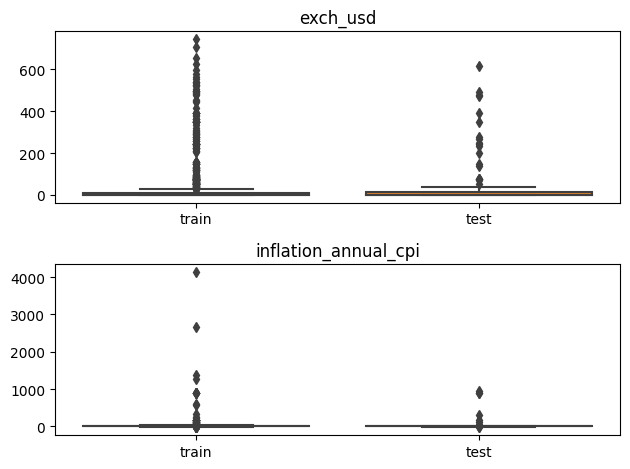

In [78]:
df_train= df_train.loc[df_train["inflation_annual_cpi"]<60000]

fig, axs = plt.subplots(2)
sns.boxplot([df_train["exch_usd"],df_test["exch_usd"]], ax=axs[0])
sns.boxplot([df_train["inflation_annual_cpi"],df_test["inflation_annual_cpi"]], ax=axs[1])
axs[0].title.set_text("exch_usd")
axs[1].title.set_text("inflation_annual_cpi")
axs[0].set_xticks(ticks=[0,1],labels=["train","test"])
axs[1].set_xticks(ticks=[0,1],labels=["train","test"])
plt.tight_layout()

Sono ancora presenti diversi outlier, ma la distribuzione è migliore. Date le code lunghe, possiamo applicare una trasformazione ai dati per ridurne la curtosi, ad esempio `PowerTransformer`:

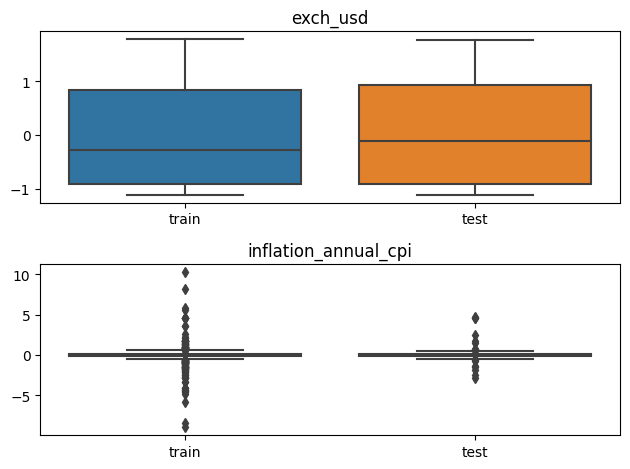

In [79]:
from sklearn.preprocessing import PowerTransformer

float_cols = ["exch_usd", "inflation_annual_cpi"]
transformer = PowerTransformer()

# Utilizzeremo questa copia successivamente
df_test_copy = df_test.copy(deep=True)

transformer.fit(df_train[float_cols])
df_train[float_cols]=transformer.transform(df_train[float_cols])
df_test[float_cols]=transformer.transform(df_test[float_cols])

fig, axs = plt.subplots(2)
sns.boxplot([df_train["exch_usd"],df_test["exch_usd"]], ax=axs[0])
sns.boxplot([df_train["inflation_annual_cpi"],df_test["inflation_annual_cpi"]], ax=axs[1])
axs[0].title.set_text("exch_usd")
axs[1].title.set_text("inflation_annual_cpi")
axs[0].set_xticks(ticks=[0,1],labels=["train","test"])
axs[1].set_xticks(ticks=[0,1],labels=["train","test"])
plt.tight_layout()

In [80]:
display(get_info(df_train[float_cols]),get_info(df_test[float_cols]))

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
exch_usd,float64,596,0,952.0,-2.985474e-17,1.000526,-1.118646,-0.909779,-0.290482,0.830701,1.782541
inflation_annual_cpi,float64,865,0,952.0,-5.224579e-17,1.000526,-8.962814,-0.131491,-0.002013,0.157640,10.302484


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
exch_usd,float64,92,0,106.0,0.027088,1.036906,-1.118646,-0.910453,-0.111843,0.927918,1.76325
inflation_annual_cpi,float64,100,0,106.0,0.094544,0.973765,-2.878189,-0.127682,-0.002233,0.117712,4.69058


None

None

Abbiamo quindi trasformato le nostre features in una forma più adatta ai passaggi successivi.

In [81]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizzazione

minx_max_norm = MinMaxScaler()
minx_max_norm.fit(df_train[["exch_usd"]])
# Train
df_train["exch_usd"] = minx_max_norm.transform(df_train[["exch_usd"]])
# Test
df_test["exch_usd"] = minx_max_norm.transform(df_test[["exch_usd"]])

# Standardizzazione

standardizer = StandardScaler()
standardizer.fit(df_train[["inflation_annual_cpi"]])
# Train
df_train["inflation_annual_cpi"] = standardizer.transform(df_train[["inflation_annual_cpi"]])
# Test
df_test["inflation_annual_cpi"] = standardizer.transform(df_test[["inflation_annual_cpi"]])

display(
    get_info(df_train[["exch_usd", "inflation_annual_cpi"]]),
    get_info(df_test[["exch_usd", "inflation_annual_cpi"]]),
)

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
exch_usd,float64,596,0,952.0,3.855821e-01,0.344868,0.000000,0.071994,0.285457,0.671914,1.000000
inflation_annual_cpi,float64,865,0,952.0,1.492737e-17,1.000526,-8.962814,-0.131491,-0.002013,0.157640,10.302484


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
exch_usd,float64,92,0,106.0,0.394919,0.357407,0.000000,0.071761,0.347031,0.705423,0.993351
inflation_annual_cpi,float64,100,0,106.0,0.094544,0.973765,-2.878189,-0.127682,-0.002233,0.117712,4.690580


None

None

Infine normalizziamo le restanti feature del nostro dataset.

In [82]:
# Utilizziamo MinMaxScaler, classe di scikit-learn dedicata alla normalizzazione delle feature in un range
min_max_transform = MinMaxScaler()
transformed_columns = ["exch_usd", "inflation_annual_cpi"]
# Selezioniamo le colonne non ancora trasformate
to_transform_columns = df_train.loc[:,df_train.columns.isin(transformed_columns) == False].columns
display(to_transform_columns)

Index(['Latitude (average)', 'Longitude (average)', 'banking_crisis',
       'currency_crises', 'domestic_debt_in_default', 'gdp_weighted_default',
       'independence', 'inflation_crises', 'sovereign_external_debt_default',
       'systemic_crisis', 'year'],
      dtype='object')

In [83]:
# Il metodo `fit_transform` combina il fitting e l'applicazione della trasformazione in un solo step
df_train[to_transform_columns] = min_max_transform.fit_transform(df_train[to_transform_columns])

In [84]:
# In questo caso usiamo solo `transform`, in quanto la trasformazione è già fittata sul train set
df_test[to_transform_columns] = min_max_transform.transform(df_test[to_transform_columns])

Queste trasformazioni sono molto utili ma potremmo chiederci come invertirle, ovvero ottenere i dati originali.
Soluzione: ogni classe di `scikit-learn` per trasformazioni invertibili implementa (una volta fittata) un metodo `inverse_transform`.

In [85]:
def inverse_transform_df(df, scaler):
    # Questa funzione applica il metodo `inverse_transform` di un'oggetto scaler ad un dataframe df
    return pd.DataFrame(
        scaler.inverse_transform(df),
        columns=df.columns,
    )

# Applichiamo la trasformazione inversa alle colonne appena trattate
inverted_df = inverse_transform_df(df_test[to_transform_columns], min_max_transform)

# Controlliamo che il risultato corrisponda effettivamente al dataframe originale
np.allclose(inverted_df[to_transform_columns], df_test_copy[to_transform_columns], rtol=1e-05, atol=1e-08, equal_nan=False)

True

## Calcolo delle correlazioni

La correlazione tra caratteristiche (features) e obiettivo (target) sottintende il rapporto lineare tra le variabili indipendenti (o caratteristiche) e la variabile dipendente (o obiettivo). Viene utilizzato per quantificare il grado in cui un cambiamento nelle caratteristiche può influenzare il target. Può essere utile, nel caso di modelli lineari, per selezionare le variabili più promettenti in fase di modellizzazione.

Nel prossimo notebook creeremo modelli di regressione e classificazione per i target `annual_inflation_cpi` e `banking_crisis`, quindi valutiamo la correlazione delle features con questi due possibili target.

In [86]:
bc_corr=(
    df.corr(numeric_only=True)["banking_crisis"]
    .sort_values()
)
iac_corr=(
    df.corr(numeric_only=True)["inflation_annual_cpi"]
    .sort_values()
)
pd.DataFrame({"banking_crisis_correlation": bc_corr, "inflation_correlation": iac_corr})

,banking_crisis_correlation,inflation_correlation
Latitude (average),-0.005060,-0.040557
Longitude (average),0.003730,0.017219
banking_crisis,1.000000,0.123220
currency_crises,0.166859,0.100570
domestic_debt_in_default,0.225797,0.189953
exch_usd,0.168766,-0.015252
gdp_weighted_default,0.026545,-0.005623
independence,0.159620,0.021060
inflation_annual_cpi,0.123220,1.000000
inflation_crises,0.235852,0.104530


# Export dei dataset

Ora che i nostri dati sono pronti per la modellizzazione esportiamoli in due `csv` distinti, pronti per i prossimi passaggi:

In [88]:
df_train.to_csv("../Day3-MachineLearning/datasets/train.csv", index=False)
df_test.to_csv("../Day3-MachineLearning/datasets/test.csv", index=False)